In [1]:
import numpy as np
import matplotlib.pyplot as plt
import image_transform
from sklearn.preprocessing import MinMaxScaler
from flower_model import FlowerModel

flower_model = FlowerModel()
flower_model.fetch()
labels = flower_model.get_class_labels()

print('class: {}'.format(labels))

class: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [2]:
test_ratio = 0.2
X_train, X_test, y_train, y_test = flower_model.train_test_split(test_ratio)

print('Train samples:', X_train.shape)
print('Test samples:', X_test.shape)

Train samples: (2936, 299, 299, 3)
Test samples: (734, 299, 299, 3)


In [3]:
scaler = MinMaxScaler(copy=False)

original_shape = X_train.shape
X_train = scaler.fit_transform(X_train.reshape(-1, original_shape[-1]))
X_train = X_train.reshape(original_shape)

X_batch: (150, 299, 299, 3)


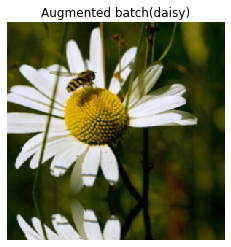

X_batch: (150, 299, 299, 3)


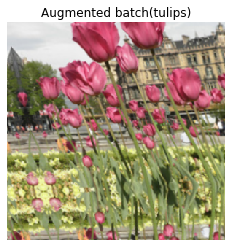

X_batch: (150, 299, 299, 3)


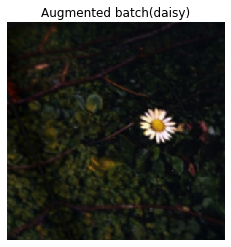

X_batch: (150, 299, 299, 3)


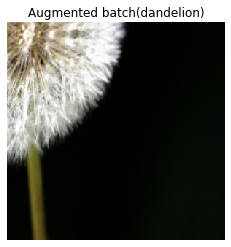

In [4]:
iteration = 0
max_iteration = 3
batch_size = 30
aug_size = 5

batch_generator = flower_model.random_batch(X_train, y_train, batch_size,
                                            augmentation_op=image_transform.random_transform,
                                            aug_size=aug_size)
idx_to_class = flower_model.idx_to_class()

for X_batch, y_batch in batch_generator:
    print('X_batch:', X_batch.shape)

    plt.figure()
    plt.title('Augmented batch({})'.format(idx_to_class[y_batch[0]]))
    plt.imshow(X_batch[0])
    plt.axis('off')
    plt.show()

    iteration += 1
    if iteration > max_iteration:
        break